# Import Packages

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from networkx.algorithms import community
import cartopy.io.img_tiles as cimgt

# Read Flight Data

In [2]:
flight_data = pd.read_excel('Flight Data.xlsx', encoding = 'unicode_escape', header = 0, sheet_name=0)

In [3]:
flight_data.head()

,Source,Source City,Source Country,Target,Target City,Target Country,Weight,TimeSeries
0,FNC,Funchal,Portugal,PXO,Porto Santo,Portugal,9864,2003-07-01
1,PXO,Porto Santo,Portugal,FNC,Funchal,Portugal,9864,2003-07-01
2,AEP,Buenos Aires,Argentina,MVD,Montevideo,Uruguay,1463,2003-07-01
3,MVD,Montevideo,Uruguay,AEP,Buenos Aires,Argentina,1463,2003-07-01
4,AEP,Buenos Aires,Argentina,ROS,Rosario (AR),Argentina,2261,2003-07-01


In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489353 entries, 0 to 489352
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Source          489353 non-null  object        
 1   Source City     489353 non-null  object        
 2   Source Country  489353 non-null  object        
 3   Target          489353 non-null  object        
 4   Target City     489353 non-null  object        
 5   Target Country  489353 non-null  object        
 6   Weight          489353 non-null  int64         
 7   TimeSeries      489353 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 29.9+ MB


# Read Airports Data

In [5]:
airports = pd.read_csv('airports_1.csv')
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [6]:
airports_cl = airports[airports['iata_code'].notna()]

In [7]:
airports_cl.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
229,4650,03N,small_airport,Utirik Airport,11.222000,169.852005,4.0,OC,MH,MH-UTI,Utirik Island,yes,K03N,UTK,03N,NaN,https://en.wikipedia.org/wiki/Utirik_Airport,NaN
461,6924,07FA,small_airport,Ocean Reef Club Airport,25.325399,-80.274803,8.0,NaN,US,US-FL,Key Largo,no,07FA,OCA,07FA,https://www.oceanreef.com/community/private-ai...,https://en.wikipedia.org/wiki/Ocean_Reef_Club_...,NaN
624,7063,0AK,small_airport,Pilot Station Airport,61.934601,-162.899994,305.0,NaN,US,US-AK,Pilot Station,yes,NaN,PQS,0AK,NaN,https://en.wikipedia.org/wiki/Pilot_Station_Ai...,NaN
703,7139,0CO2,small_airport,Crested Butte Airpark,38.851918,-106.928341,8980.0,NaN,US,US-CO,Crested Butte,no,0CO2,CSE,0CO2,NaN,NaN,Buckhorn Ranch
1126,7545,0TE7,small_airport,LBJ Ranch Airport,30.251801,-98.622498,1515.0,NaN,US,US-TX,Johnson City,no,0TE7,JCY,0TE7,NaN,NaN,NaN


# Create Dictionary of Airports and Positions

In [8]:
airports_dict = {item['iata_code']:(item['longitude_deg'],item['latitude_deg']) for item in airports_cl.to_dict(orient='records')}
airports_dict

{'UTK': (169.852005, 11.222000000000001),
 'OCA': (-80.27480316, 25.3253994),
 'PQS': (-162.899994, 61.934601),
 'CSE': (-106.92834099999999, 38.851918),
 'JCY': (-98.62249756, 30.25180054),
 'PMX': (-72.311401, 42.223301),
 'WLR': (-131.63699340000002, 55.60129929),
 'NUP': (-162.44045400000002, 60.905591),
 'PTC': (-133.597, 55.803000000000004),
 'ICY': (-141.66011799999998, 59.966269),
 'PPV': (-133.6100006, 56.328800199999996),
 'KKK': (-156.8203926, 64.4166257),
 'MHS': (-122.272003, 41.263199),
 'NIR': (-97.661917, 28.362444),
 'GCT': (-113.231159, 36.258614),
 'ELW': (-146.704038, 60.893818),
 'LVD': (-155.4400024, 61.35910034),
 'HGZ': (-155.6690063, 66.21610260000001),
 'OTN': (-87.49970245, 38.85139847),
 'TLF': (-153.26899719999997, 63.39390182),
 'BZT': (-95.57969666, 28.98220062),
 'HBH': (-133.43848, 57.412201),
 'FAK': (-135.2129974, 57.53219986),
 'BYW': (-122.82599640000001, 48.57899857),
 'DRF': (-152.1620026, 60.58890152),
 'BDF': (-89.61569977, 41.23089981),
 'VRS':

# Prune Flight Data using Airport Data

In [9]:
airports_used = airports['iata_code'].dropna()
airports_used

229      UTK
461      OCA
624      PQS
703      CSE
1126     JCY
        ... 
69187    SHE
69188    ZYA
69189    YNJ
69190    YKH
69195    ZYW
Name: iata_code, Length: 9236, dtype: object

In [10]:
flights_pruned = flight_data[(flight_data.Source.isin(airports_used))&(flight_data.Target.isin(airports_used))]
len(flights_pruned)

485893

# Compute Metrics and Plot Graphs

In [12]:
def country_metrics(flight_data, extents, country_str, arr_w, arr_dx):

    flight_data_country = flight_data[(flight_data['Source Country']==country_str) & (flight_data['Target Country']==country_str) & (flight_data['TimeSeries'].dt.month == 7) & (flight_data['TimeSeries'].dt.year == 2007)]

    # Generate Graph
    G = nx.from_pandas_edgelist(flight_data_country, 'Source', 'Target', 'Weight', create_using=nx.MultiDiGraph()) # MultiDiGraph for projection on map

    flight_data_country_summed = flight_data_country.groupby(['Source', 'Target'],as_index=False).agg({'Weight':'sum'}).reset_index(drop=True)

    G2 = nx.from_pandas_edgelist(flight_data_country_summed,'Source', 'Target', 'Weight', create_using=nx.DiGraph()) # DiGraph for plotting all other graphs
   
    # Weighted Degree Distribution
    degrees_descending = sorted([d for n, d in G2.degree(weight = 'Weight')], reverse = True)
    plt.figure(figsize=(8,6))
    plt.plot(degrees_descending, marker = 'o', markersize = 2)
    plt.xlabel('Node Number (Ranked by Descending Degree)')
    plt.ylabel('Weighted Degree (log scale)')
    plt.yscale('log')
    plt.title('Weighted Degree Distribution: ' + country_str + ' (07/2007)')
    plt.show()

    # Degree vs betweenness distribution
    bet_cent = nx.betweenness_centrality(G2, normalized=False)
    deg = [d for n, d in G2.degree()]
    plt.figure(figsize=(8,6))
    plt.scatter(deg, list(bet_cent.values()))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Betweenness Centrality (log scale)')
    plt.title('Degree vs Betweenness Centrality: ' + country_str + ' (07/2007)')
    plt.ylim(1e0, 1e6)
    plt.show()

    # Assortativity (Degree Correlation)
    assort = nx.degree_pearson_correlation_coefficient(G2, weight="weight")
    print('Assortativity: ', assort)
    avg_neighbour_deg = nx.average_neighbor_degree(G2, source = 'out', target = 'in')
    plt.figure(figsize=(8,6))
    plt.scatter(deg, avg_neighbour_deg.values())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1e0, 1e3)
    plt.ylim(1e0, 1e3)
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Average Weighted Neighbour Degree (log scale)')
    plt.title('Assortativity: ' + country_str + ' (07/2007)')
    plt.show()

    # Core community detection
    df = pd.DataFrame([(id, deg) for (id, deg) in sorted(G2.degree, key = lambda x: x[1], reverse = True)]).rename(columns = {0:'id', 1:'degree'})
    df['rank'] = df['degree'].rank(ascending = False)
    k_plus_neighbours = []
    for id in df['id']:
        count = 0
        for i in G2.neighbors(id):
            if df[df['id'] == i].iloc[0]['degree'] > df[df['id'] == id].iloc[0]['degree']:
                count += 1
        k_plus_neighbours.append(count)

    max_k_plus_neigh = max(k_plus_neighbours)
    max_index = k_plus_neighbours.index(max_k_plus_neigh)
    print('Core Size: ', max_index, '\nPeriphery Size: ', (len(k_plus_neighbours)-max_index))

    plt.figure(figsize=(12,6))
    plt.axvline(x=max_index, linestyle = '--', color = 'r')
    plt.plot(k_plus_neighbours, marker = '.', markersize = 2)
    plt.ylim(0, 1.2*max(k_plus_neighbours))
    plt.xlim(-arr_dx*1.5, len(k_plus_neighbours)*1.05)
    plt.arrow(x=max_index, y=(1.025*max(k_plus_neighbours)), dx=-(max_index+arr_dx), dy=0, width=arr_w, facecolor='orange', edgecolor = 'None')
    plt.text(0.5*max_index/2, ((1.1*max(k_plus_neighbours))), 'Core Nodes', ha='center')
    plt.arrow(x=max_index, y=(1.025*max(k_plus_neighbours)), dx=len(k_plus_neighbours)-max_index, dy=0, width=arr_w, facecolor='cyan', edgecolor = 'None')
    plt.text(max_index+(len(k_plus_neighbours)-max_index)/2, ((1.1*max(k_plus_neighbours))), 'Periphery Nodes', ha='center')
    plt.xlabel('Node Number (Ranked by Descending Degree)')
    plt.ylabel('Connections to Higher Degree Nodes')
    plt.title('Core Community Detection: ' + country_str + ' (07/2007)')
    plt.show()

    # Project Graph on Map
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(1, 1, figsize=(16, 16),
    subplot_kw=dict(projection=crs))
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent(extents)
    nx.draw_networkx_nodes(G, pos = airports_dict, node_list = G.nodes(), 
    node_color = 'r', alpha = 0.8, node_size = 30)
    nx.draw_networkx_edges(G, pos = airports_dict, edge_color='b',
    alpha=0.07, arrows = False)     

# Assortativity Bar Chart

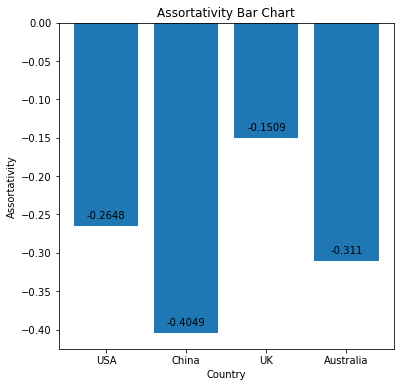

In [13]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.01, y[i], ha = 'center')

assort_labels = ['USA', 'China', 'UK', 'Australia']
assort = [-0.2648,-0.4049,-0.1509,-0.311]
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Assortativity Bar Chart')
plt.xlabel('Country')
plt.ylabel('Assortativity')
addlabels(assort_labels, assort)
plt.bar(assort_labels, assort)
plt.show()

## USA Metrics

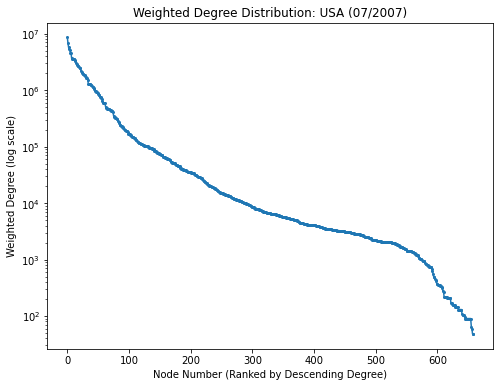

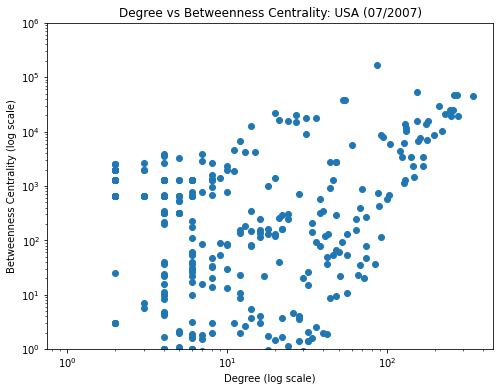

Assortativity:  -0.2648776546842806


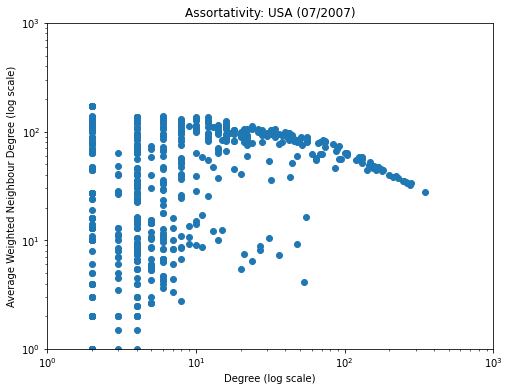

Core Size:  40 
Periphery Size:  619


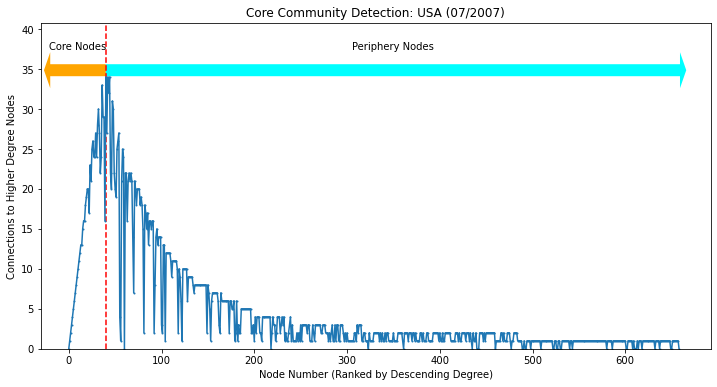

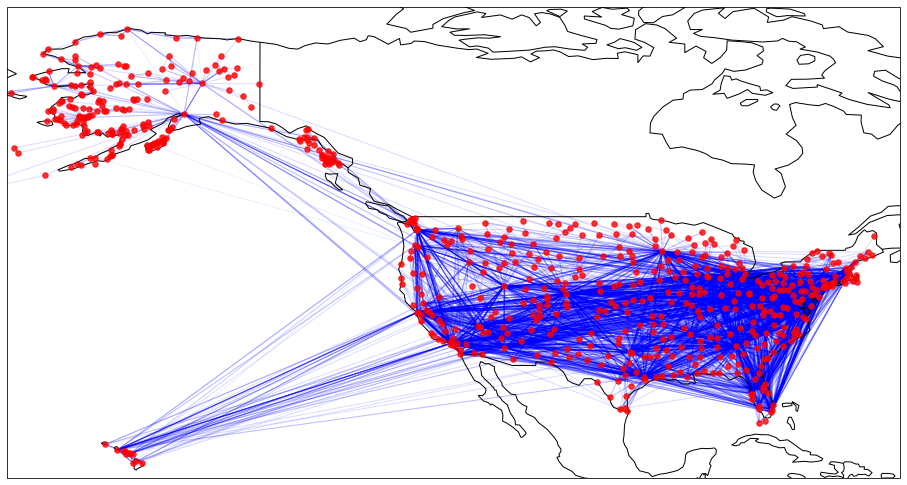

In [14]:
country_metrics(flights_pruned,[-171, -65, 18, 65], 'USA', 1.5, 20)

## China Metrics

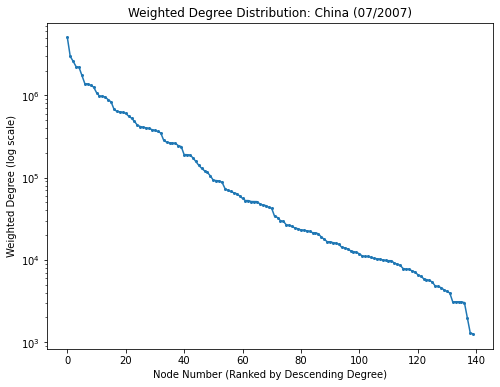

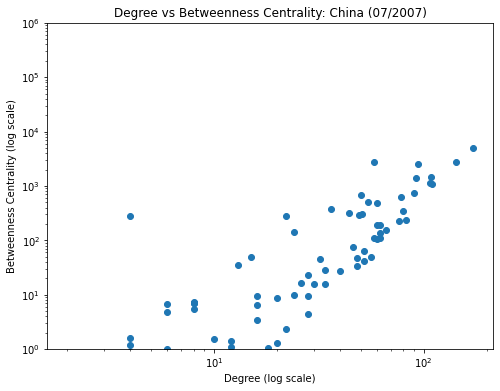

Assortativity:  -0.40498600690691455


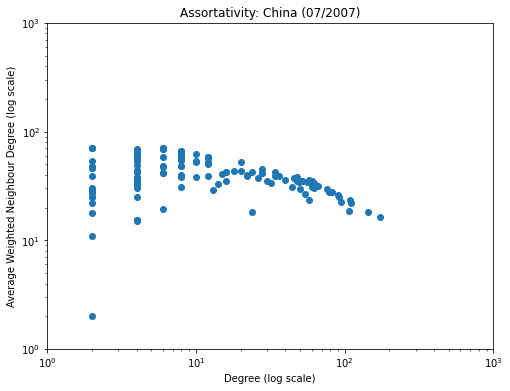

Core Size:  28 
Periphery Size:  112


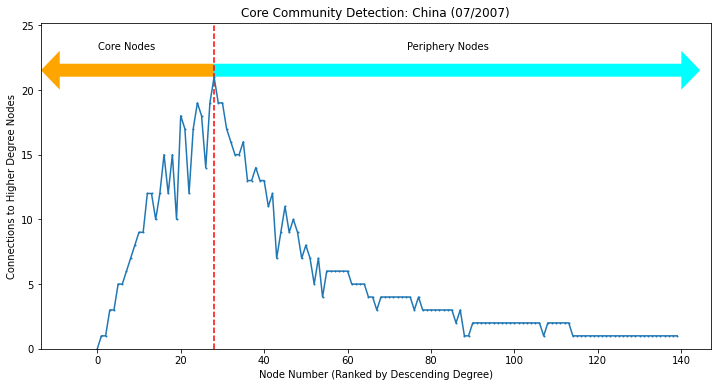

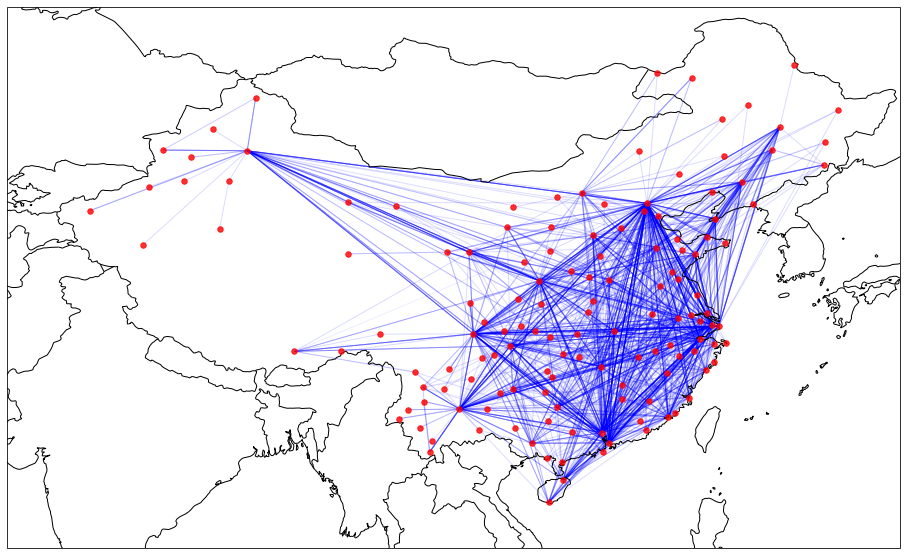

In [15]:
country_metrics(flights_pruned, [70, 135, 15, 50], 'China', 1, 9)

## UK Metrics

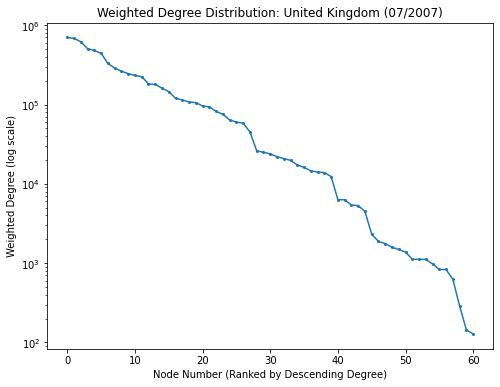

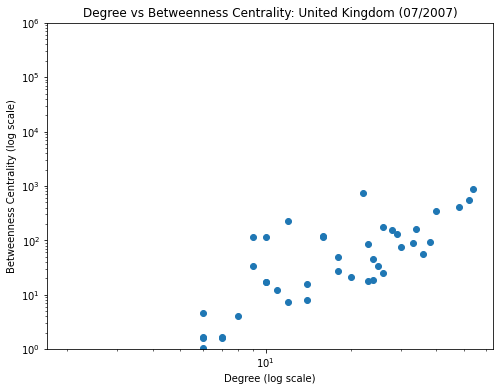

Assortativity:  -0.15076407261178226


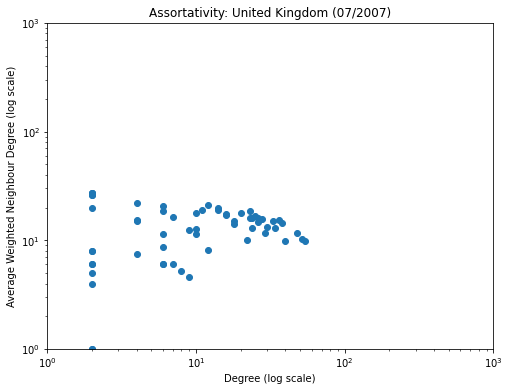

Core Size:  16 
Periphery Size:  45


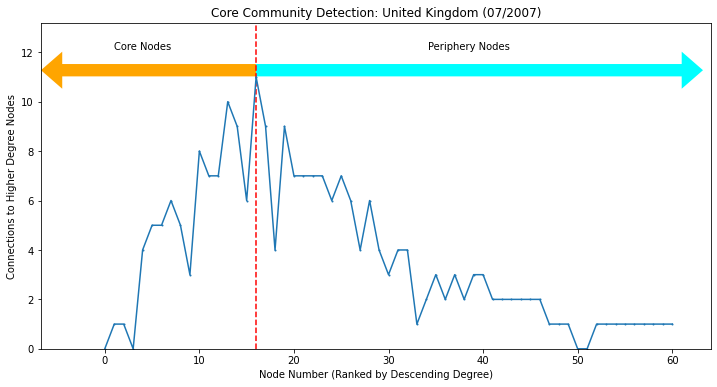

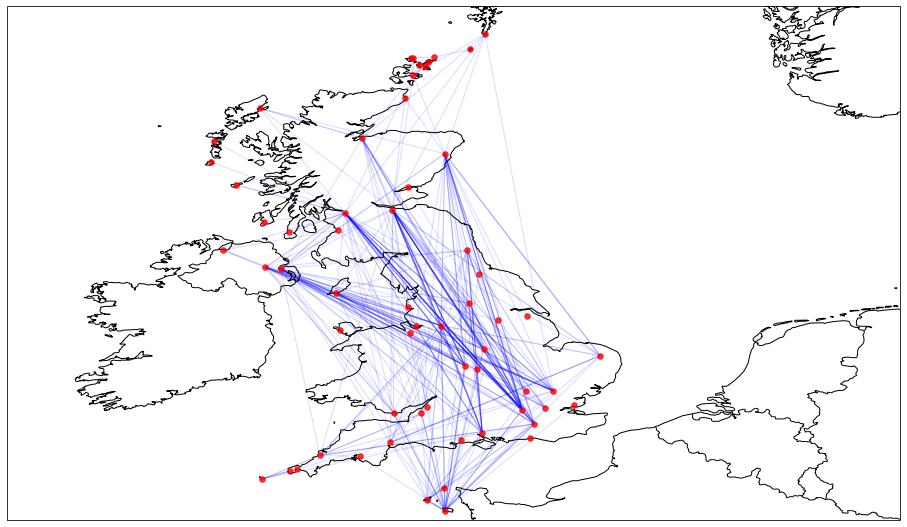

In [16]:
country_metrics(flights_pruned, [-12, 8, 49, 60.5], 'United Kingdom', 0.5, 4.5)

## Australia Metrics

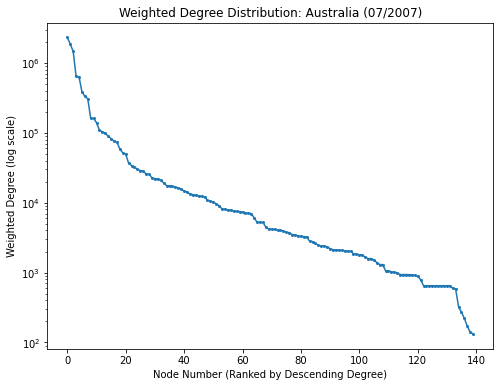

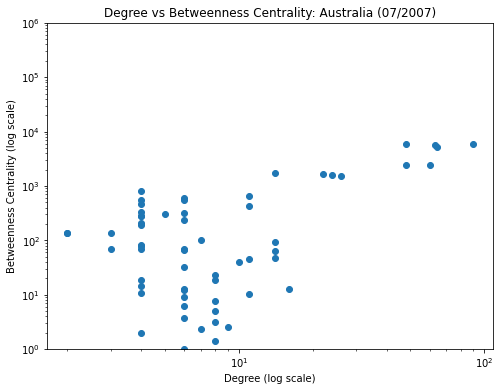

Assortativity:  -0.3110154947787949


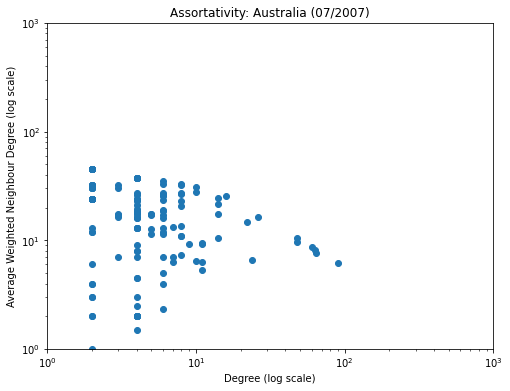

Core Size:  9 
Periphery Size:  131


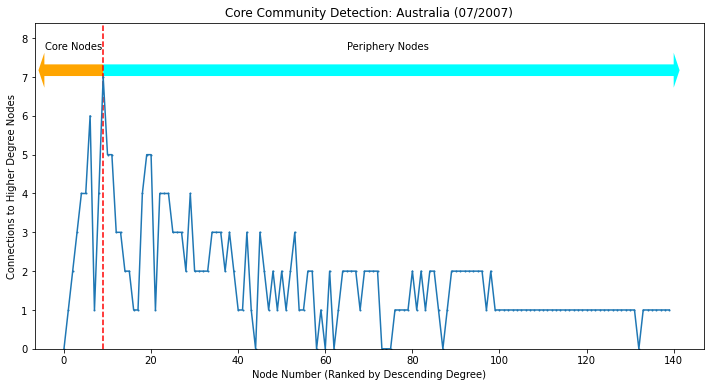

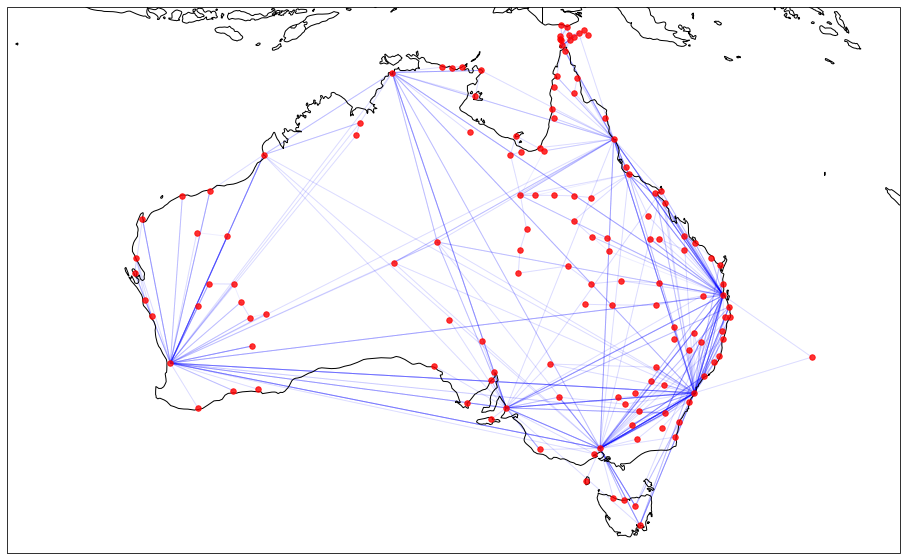

In [17]:
country_metrics(flights_pruned, [105, 165, -8, -41], 'Australia', 0.3, 4.5)

# UK Population Distribution

In [65]:
population_data = pd.read_excel('UK Census.xlsx', header = 0, sheet_name=0)
population_data.head()

,Area,2020
0,towncity2011:London,8960924
1,towncity2011:Birmingham,1159888
2,towncity2011:Liverpool,589774
3,towncity2011:Bristol,580199
4,towncity2011:Manchester,566896


In [66]:
pop_list = population_data[2020].tolist()

In [67]:
cleaned_pop_list = sorted([x for x in pop_list if str(x) != 'nan'], reverse = True)

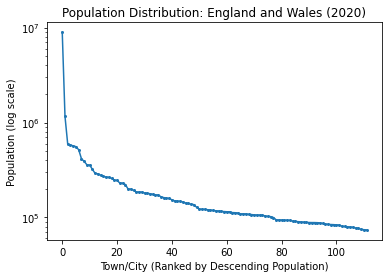

In [68]:
plt.plot(cleaned_pop_list, marker = 'o', markersize = 2)
plt.xlabel('Town/City (Ranked by Descending Population)')
plt.ylabel('Population (log scale)')
plt.yscale('log')
plt.title('Population Distribution: England and Wales (2020)')
plt.show()